In [29]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt

In [2]:
tips_df = sns.load_dataset('tips')

In [3]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips_df.shape

(244, 7)

In [5]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# EDA

In [6]:
numericals = tips_df.select_dtypes(include=np.number)
categoricals = tips_df.select_dtypes(include='category')

array([[<Axes: title={'center': 'total_bill'}>,
        <Axes: title={'center': 'tip'}>],
       [<Axes: title={'center': 'size'}>, <Axes: >]], dtype=object)

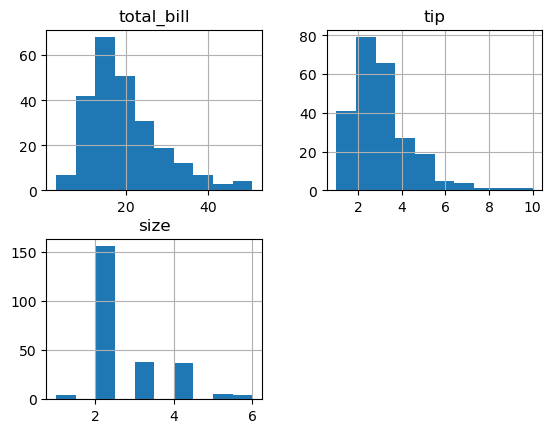

In [7]:
# plotting histograms
numericals.hist()

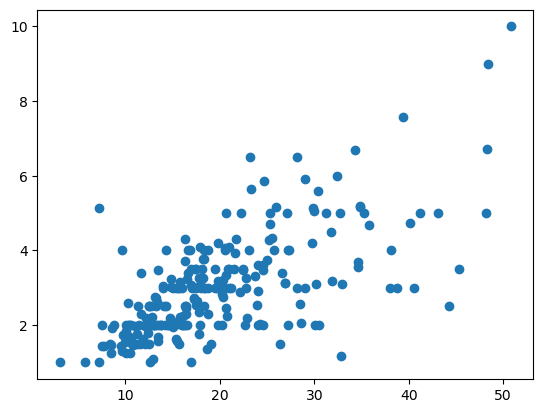

In [8]:
plt.scatter(x=numericals["total_bill"], y=numericals["tip"])

## Preprocessing - Categoricals variables enconding

In [9]:
categoricals

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


In [10]:
# OneHotEnconding

cat_encoded = pd.get_dummies(categoricals).astype(int)
cat_encoded

,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,0,1,0,1,0,0,0,1,0,1
1,1,0,0,1,0,0,0,1,0,1
2,1,0,0,1,0,0,0,1,0,1
3,1,0,0,1,0,0,0,1,0,1
4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
239,1,0,0,1,0,0,1,0,0,1
240,0,1,1,0,0,0,1,0,0,1
241,1,0,1,0,0,0,1,0,0,1
242,1,0,0,1,0,0,1,0,0,1


In [11]:
final_df = pd.concat([numericals, cat_encoded], axis=1)

## xy split

In [12]:
X = final_df.drop(columns = "tip")
y = final_df['tip']

In [13]:
X.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,2,0,1,0,1,0,0,0,1,0,1
1,10.34,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3,1,0,0,1,0,0,0,1,0,1
3,23.68,2,1,0,0,1,0,0,0,1,0,1
4,24.59,4,0,1,0,1,0,0,0,1,0,1


### Train test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [15]:
X_test

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
65,20.08,3,1,0,0,1,0,0,1,0,0,1
59,48.27,4,1,0,0,1,0,0,1,0,0,1
191,19.81,2,0,1,1,0,1,0,0,0,1,0
111,7.25,1,0,1,0,1,0,0,1,0,0,1
112,38.07,3,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23,39.42,4,1,0,0,1,0,0,1,0,0,1
136,10.33,2,0,1,0,1,1,0,0,0,1,0
55,19.49,2,1,0,0,1,0,0,0,1,0,1
22,15.77,2,0,1,0,1,0,0,1,0,0,1


## Scalling / Standardizing / PowerTransforming

In [ ]:
np.array

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# powertransform response

pt = PowerTransformer()
pt.fit(y_train)
y_train_t = pt.transform(y_train)
y_test_t = pt.transform(np.array(y_test))

### Modelling

In [17]:
# model fitting
lm = LinearRegression()
model = lm.fit(X_train_scaled, y_train)

In [18]:
y_pred = model.predict(X_test_scaled)

In [19]:
residual_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'res': y_pred-y_test})

In [20]:
residual_df 

,y_test,y_pred,res
65,3.15,2.937105,-0.212895
59,6.73,5.241188,-1.488812
191,4.19,2.721639,-1.468361
111,1.00,1.457114,0.457114
112,4.00,4.492839,0.492839
...,...,...,...
23,7.58,4.593581,-2.986419
136,2.00,1.913129,-0.086871
55,3.51,2.891976,-0.618024
22,2.23,2.321827,0.091827


In [21]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [22]:
# mse: mean squared error
model_mse = mse(y_test_t, y_pred)
model_r2 = r2(y_test_t, y_pred)
model_rmse = np.sqrt(model_mse)

In [23]:
model_mse, model_r2, model_rmse

(1.3627054427919776, 0.49124002039394166, 1.1673497516991116)

In [24]:
model.coef_

array([ 0.61259574,  0.22512934,  0.01420876, -0.01420876,  0.02817077,
       -0.02817077,  0.03929915,  0.0385747 , -0.08498824,  0.02798234,
       -0.06297725,  0.06297725])

In [25]:
model.intercept_

2.8861202185792347

In [26]:
fi_df = pd.DataFrame({'var':X.columns, 'coef': model.coef_})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'total_bill'),
  Text(1, 0, 'size'),
  Text(2, 0, 'sex_Male'),
  Text(3, 0, 'sex_Female'),
  Text(4, 0, 'smoker_Yes'),
  Text(5, 0, 'smoker_No'),
  Text(6, 0, 'day_Thur'),
  Text(7, 0, 'day_Fri'),
  Text(8, 0, 'day_Sat'),
  Text(9, 0, 'day_Sun'),
  Text(10, 0, 'time_Lunch'),
  Text(11, 0, 'time_Dinner')])

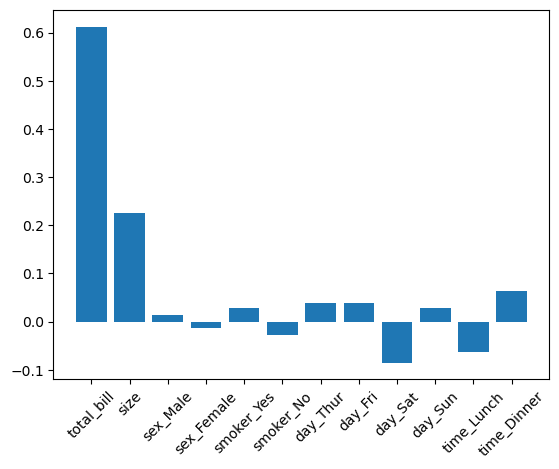

In [27]:
plt.bar(x=fi_df['var'], height=fi_df['coef'])
plt.xticks(rotation=45)

In [28]:
X['size'].describe()

count    244.000000
mean       2.569672
std        0.951100
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64

In [ ]:
plt.scatter(x=y_test_t, y)

In [ ]:
# distribution of residuals

residual_df = 

In [ ]:
# checking for homoscedasticity (costant variance of residuals) 

